# sklearn应用之员工离职预测

## 任务介绍
用Logistic回归方法，解决DataCastle中员工离职预测训练赛的问题。<br>
### 任务描述
从给定的影响员工离职的因素和员工是否离职的记录，建立一个逻辑回归模型预测有可能离职的员工。
### 数据
数据主要包括影响员工离职的各种因素（工资、出差、工作环境满意度、工作投入度、是否加班、是否升职、工资提升比例等）以及员工是否已经离职的对应记录。<br>
数据分为训练数据和测试数据，分别保存在pfm_train.csv和pfm_test.csv两个文件中。

其中训练数据主要包括1100条记录，31个字段，主要字段说明如下：<br>
（1）Age：员工年龄<br>
（2）Attrition：员工是否已经离职，1表示已经离职，2表示未离职，这是目标预测值；<br>
（3）BusinessTravel：商务差旅频率，Non-Travel表示不出差，Travel_Rarely表示不经常出差，Travel_Frequently表示经常出差；<br>
（4）Department：员工所在部门，Sales表示销售部，Research & Development表示研发部，Human Resources表示人力资源部；<br>
（5）DistanceFromHome：公司跟家庭住址的距离，从1到29，1表示最近，29表示最远；<br>
（6）Education：员工的教育程度，从1到5，5表示教育程度最高；<br>
（7）EducationField：员工所学习的专业领域，Life Sciences表示生命科学，Medical表示医疗，Marketing表示市场营销，Technical Degree表示技术学位，Human Resources表示人力资源，Other表示其他；<br>
（8）EmployeeNumber：员工号码；<br>
（9）EnvironmentSatisfaction：员工对于工作环境的满意程度，从1到4，1的满意程度最低，4的满意程度最高；<br>
（10）Gender：员工性别，Male表示男性，Female表示女性；<br>
（11）JobInvolvement：员工工作投入度，从1到4，1为投入度最低，4为投入度最高；<br>
（12）JobLevel：职业级别，从1到5，1为最低级别，5为最高级别；<br>
（13）JobRole：工作角色：Sales Executive是销售主管，Research Scientist是科学研究员，Laboratory Technician实验室技术员，Manufacturing Director是制造总监，Healthcare Representative是医疗代表，Manager是经理，Sales Representative是销售代表，Research Director是研究总监，Human Resources是人力资源；<br>
（14）JobSatisfaction：工作满意度，从1到4，1代表满意程度最低，4代表满意程度最高；<br>
（15）MaritalStatus：员工婚姻状况，Single代表单身，Married代表已婚，Divorced代表离婚；<br>
（16）MonthlyIncome：员工月收入，范围在1009到19999之间；<br>
（17）NumCompaniesWorked：员工曾经工作过的公司数；<br>
（18）Over18：年龄是否超过18岁；<br>
（19）OverTime：是否加班，Yes表示加班，No表示不加班；<br>
（20）PercentSalaryHike：工资提高的百分比；<br>
（21）PerformanceRating：绩效评估；<br>
（22）RelationshipSatisfaction：关系满意度，从1到4，1表示满意度最低，4表示满意度最高；<br>
（23）StandardHours：标准工时；<br>
（24）StockOptionLevel：股票期权水平；<br>
（25）TotalWorkingYears：总工龄；<br>
（26）TrainingTimesLastYear：上一年的培训时长，从0到6，0表示没有培训，6表示培训时间最长；<br>
（27）WorkLifeBalance：工作与生活平衡程度，从1到4，1表示平衡程度最低，4表示平衡程度最高；<br>
（28）YearsAtCompany：在目前公司工作年数；<br>
（29）YearsInCurrentRole：在目前工作职责的工作年数<br>
（30）YearsSinceLastPromotion：距离上次升职时长<br>
（31）YearsWithCurrManager：跟目前的管理者共事年数；

测试数据主要包括350条记录，30个字段，跟训练数据的不同是测试数据并不包括员工是否已经离职的记录，学员需要通过由训练数据所建立的模型以及所给的测试数据，得出测试数据相应的员工是否已经离职的预测。

## 变量定义

|变量名|变量类型|数据类型|
|:---:|:----:|:------|
|Age|连续变量|数值型|
|Attrition|分类变量|数值型|
|BusinessTravel|分类变量|字符型|
|Department|分类变量|字符型|
|DistanceFromHome|有序变量|数值型|
|Education|有序变量|数值型|
|EducationField|分类变量|字符型|
|EmployeeNumber|离散变量|数值型|
|EnvironmentSatisfaction|有序变量|数值型|
|Gender|分类变量|字符型|
|JobInvolvement|有序变量|数值型|
|JobLevel|有序变量|数值型|
|JobRole|分类变量|字符型|
|JobSatisfaction|有序变量|数值型|
|MaritalStatus|分类变量|字符型|
|MonthlyIncome|连续变量|数值型|
|NumCompaniesWorked|连续变量|数值型|
|Over18|分类变量|字符型|
|OverTime|分类变量|字符型|
|PercentSalaryHike|连续变量|数值型|
|PerformanceRating|有序变量|数值型|
|RelationshipSatisfaction|有序变量|数值型|
|StandardHours|连续变量|数值型|
|StockOptionLevel|有序变量|数值型|
|TotalWorkingYears|连续变量|数值型|
|TrainingTimesLastYear|有序变量|数值型|
|WorkLifeBalance|有序变量|数值型|
|YearsAtCompany|连续变量|数值型|
|YearsInCurrentRole|连续变量|数值型|
|YearsSinceLastPromotion|连续变量|数值型|
|YearsWithCurrManager|连续变量|数值型|

In [2]:
# 目标变量
target_var = 'Attrition'

# 连续变量
num_col = ['Age', 'MonthlyIncome', 'TotalWorkingYears','PercentSalaryHike',
           'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
           'YearsWithCurrManager', 'NumCompaniesWorked']
# 有序变量
ord_col = ['DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
           'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
           'StockOptionLevel', 'WorkLifeBalance', 'TrainingTimesLastYear']

# 分类变量
cat_col = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
           'MaritalStatus', 'OverTime']

In [3]:
#pandas, numpy, matplotlib, seaborn
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from scipy import stats

from sklearn.preprocessing import LabelEncoder

In [4]:
df_train = pd.read_csv('../dataset/pfm_train.csv')
df_test = pd.read_csv('../dataset/pfm_test.csv')
df_train['sum'] = 1

## 变量分析
### 连续变量

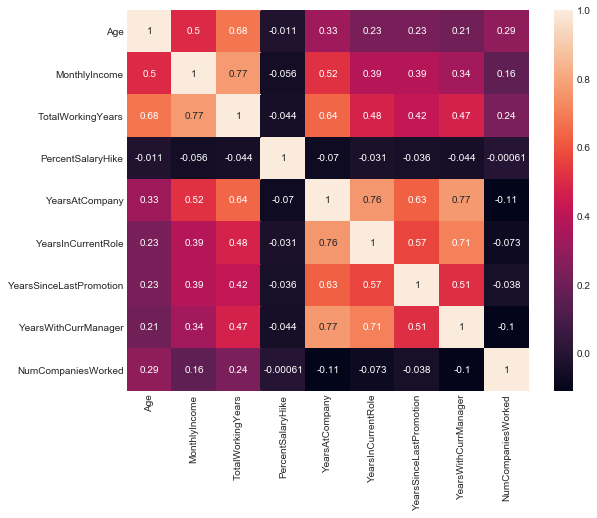

In [5]:
corr = df_train[num_col].corr()
fig = plt.figure(figsize=(9,7))
_ = sns.heatmap(corr, annot=True)

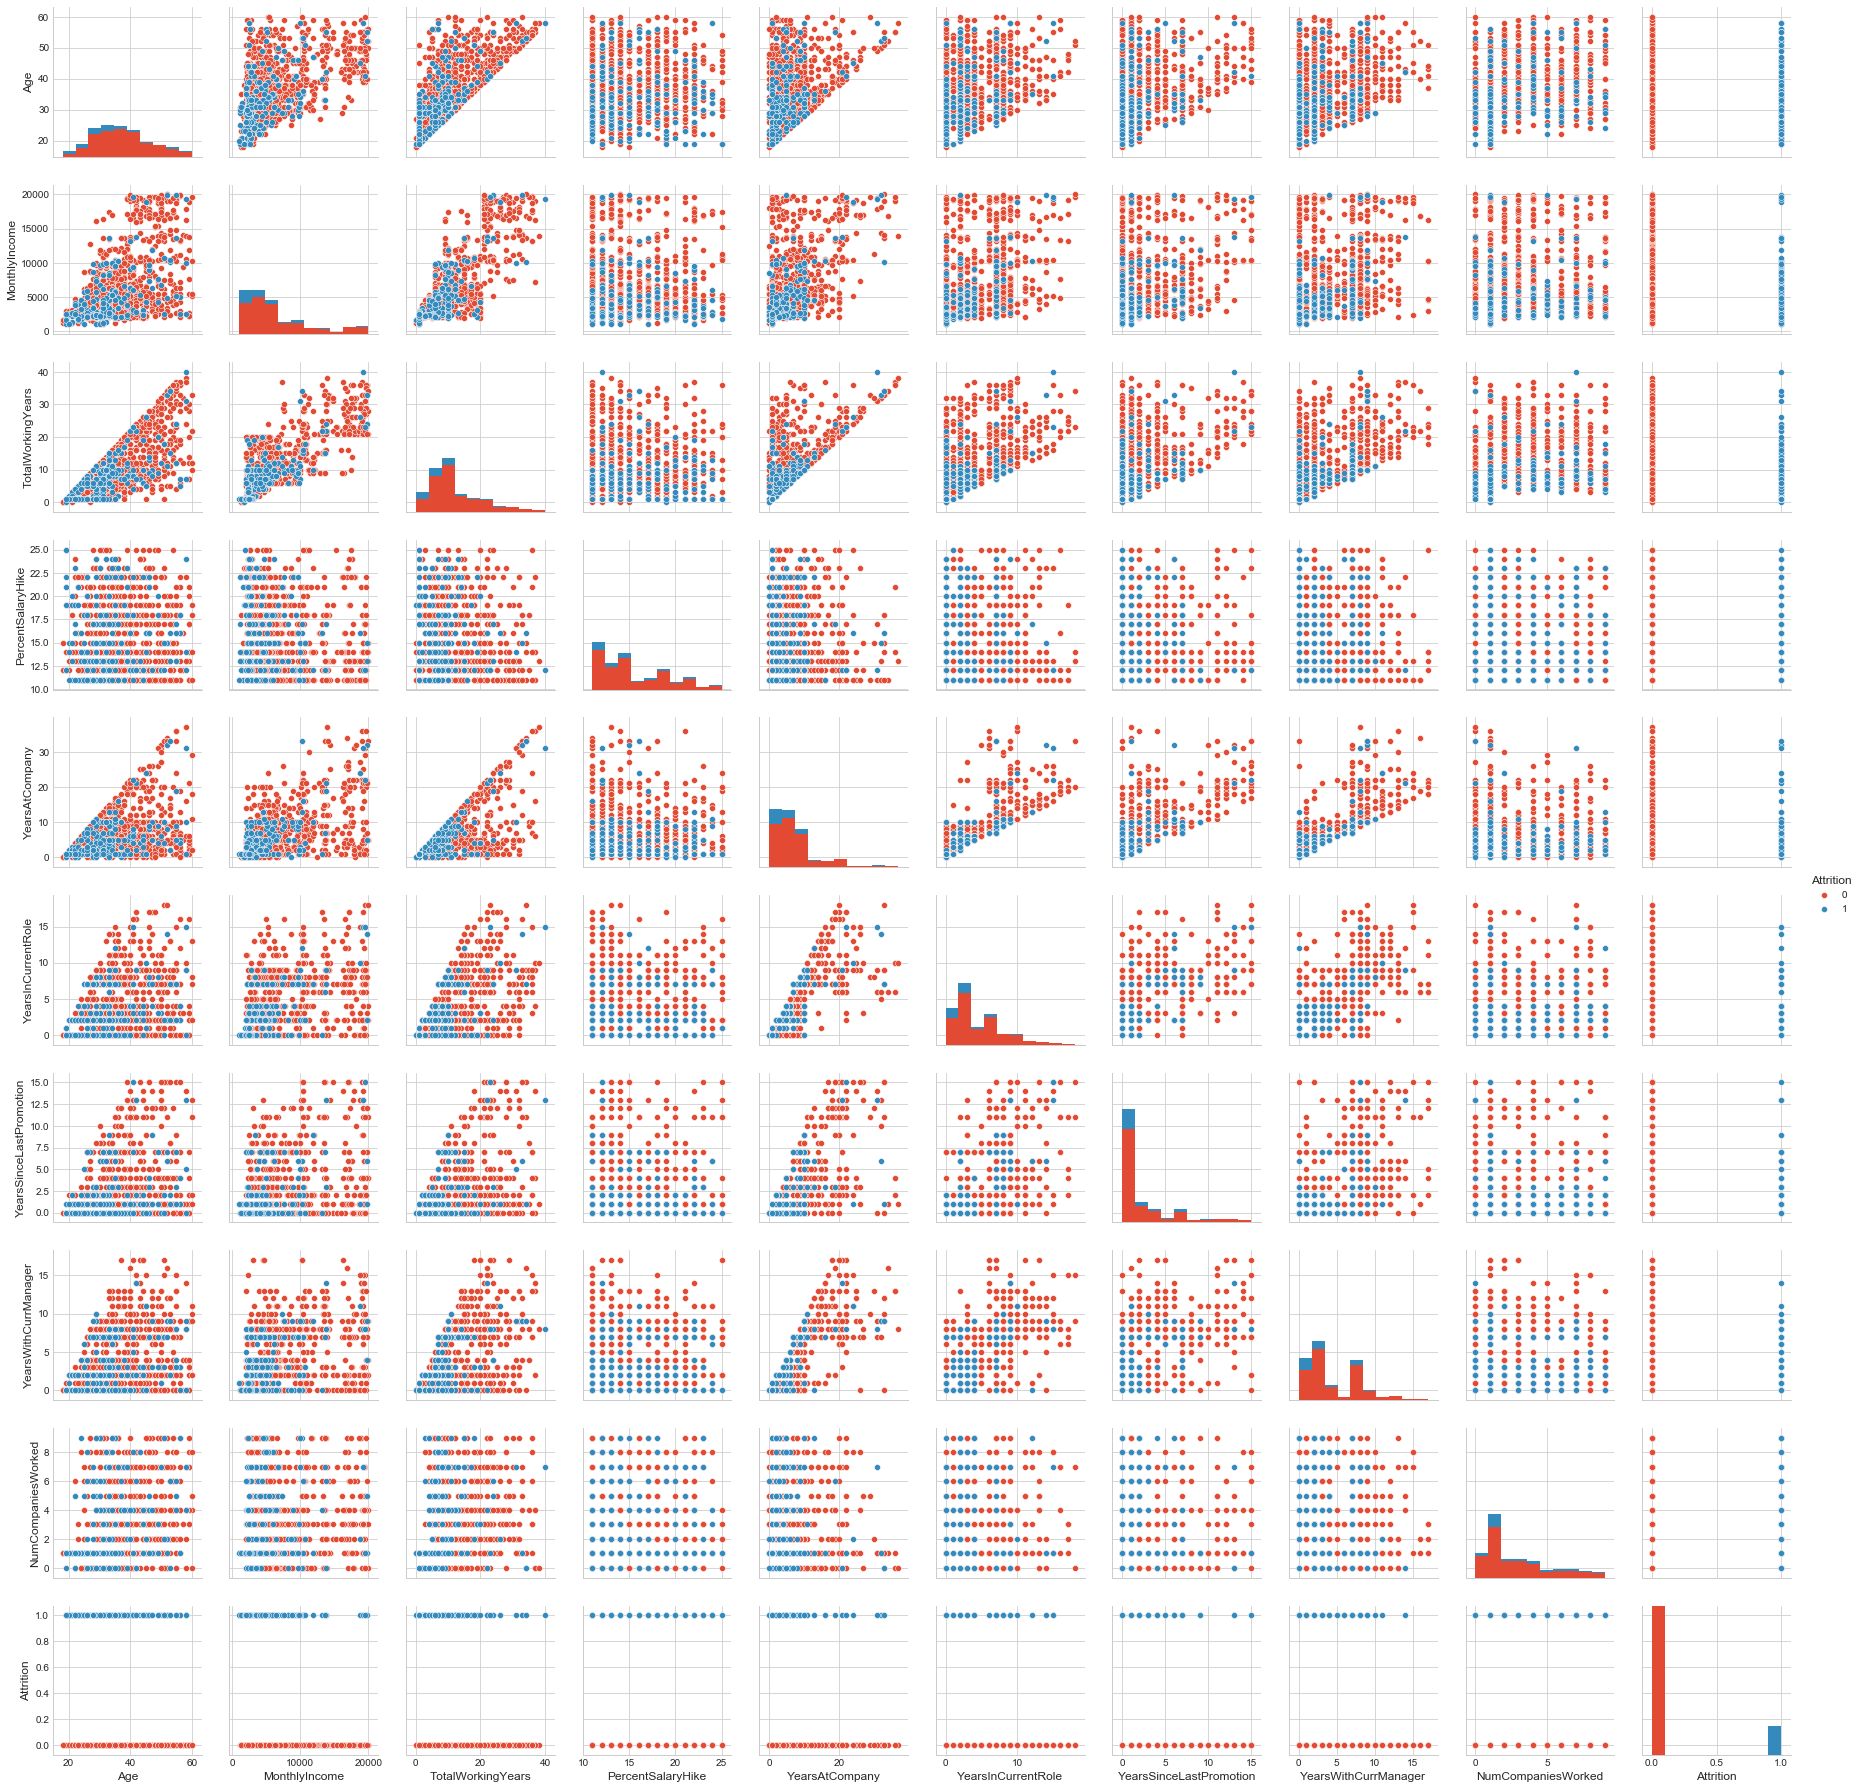

In [6]:
sns.pairplot(data=df_train[num_col+[target_var]], hue='Attrition')

对照上面的两张图，可以看出：
1. 和时间有关的特征，基本呈现一种正相关的关系。其中相关系数比较大的有：**Age和TotalWorkingYeas**，**TotalWorkingYears和YearsAtCompany**， **YearsAtCompnay和YearsInCurrRole、YearsWithCurrManager**；
2. **MonthlyIncome和TotalWorkingYears**的相关系数比较大；
3. **PercentSalaryHike**和其他变量都没有关系
从上面的图上还可以看出，有些特征分布的非常广，存在长尾，比如MonthlyIncome。

In [7]:
# 检查每个连续变量的偏度
for col in num_col:
    print('{}------{:.4f}'.format(col, df_train[col].skew()))

Age------0.4441
MonthlyIncome------1.3886
TotalWorkingYears------1.1578
PercentSalaryHike------0.7876
YearsAtCompany------1.8188
YearsInCurrentRole------0.9540
YearsSinceLastPromotion------1.9502
YearsWithCurrManager------0.8656
NumCompaniesWorked------1.0297


MonthlyIncome,YearsAtCompany和YearsSinceLastPromotion的偏度还是非常大。考虑到有些连续特征的特征值可能为0，比如YearAtCompany，如果进行对数变换，某些取值就会为NA，因此采用开平方转换。

Age_sqrt------0.1863
MonthlyIncome_sqrt------0.8788
TotalWorkingYears_sqrt------0.2395
PercentSalaryHike_sqrt------0.6215
YearsAtCompany_sqrt------0.4887
YearsInCurrentRole_sqrt-------0.2485
YearsSinceLastPromotion_sqrt------0.7602
YearsWithCurrManager_sqrt-------0.2361
NumCompaniesWorked_sqrt------0.0422


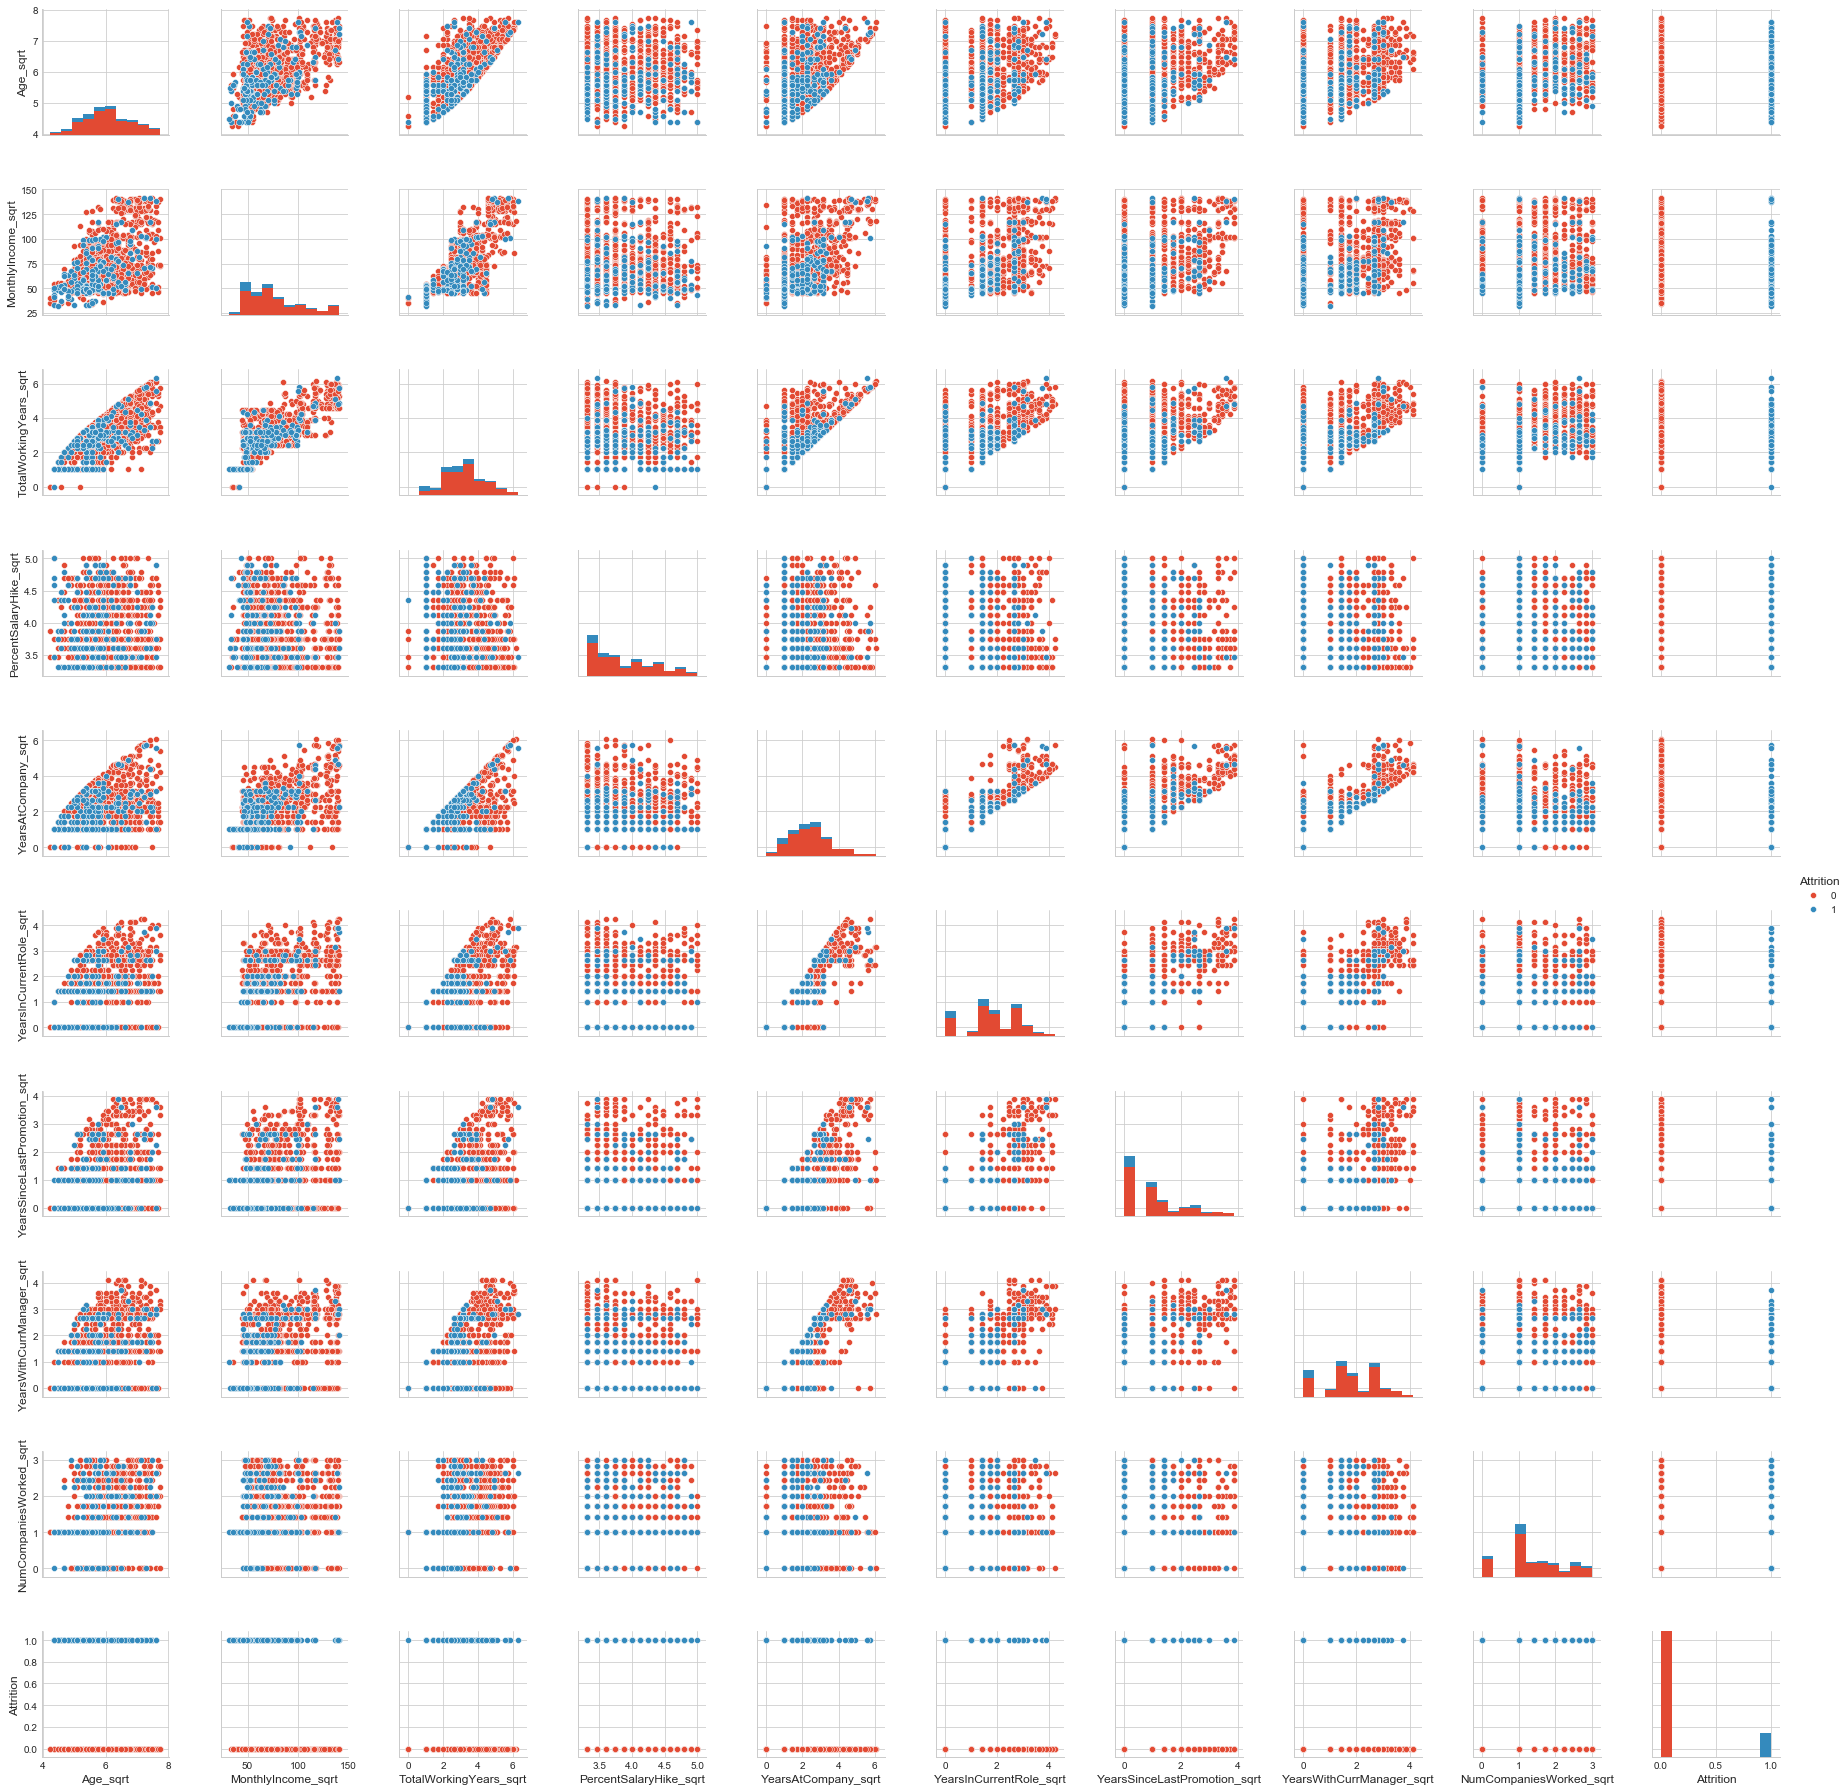

In [8]:
sqrt_num_col = []
for col in num_col:
    name = col + '_sqrt'
    sqrt_num_col.append(name)
    df_train[name] = np.sqrt(df_train[col])
    print('{}------{:.4f}'.format(name, df_train[name].skew()))
sns.pairplot(data=df_train[sqrt_num_col+[target_var]], hue='Attrition')

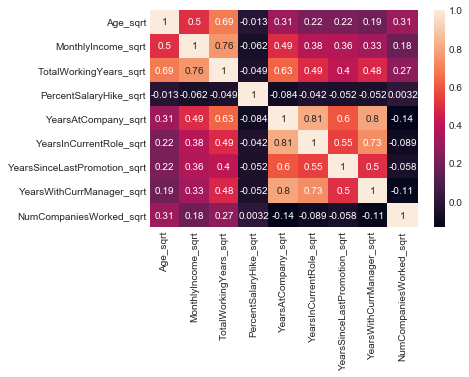

In [9]:
sns.heatmap(df_train[sqrt_num_col].corr(), annot=True)

### 分类变量分析

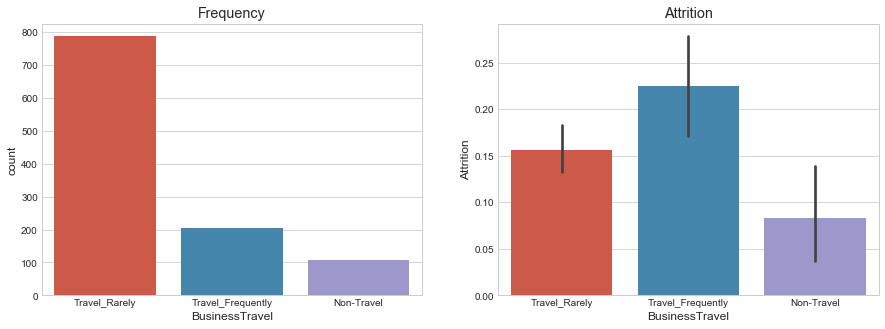

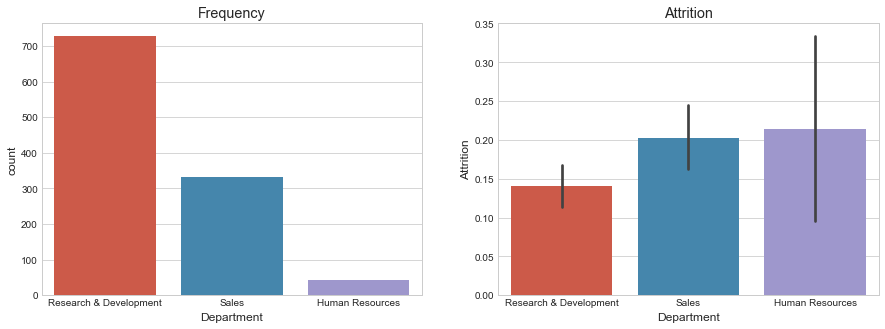

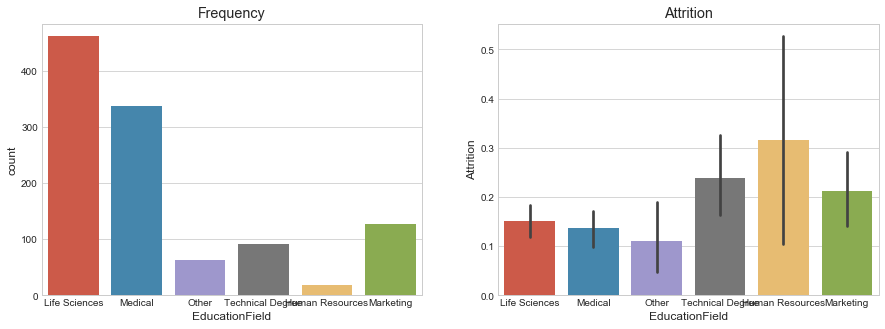

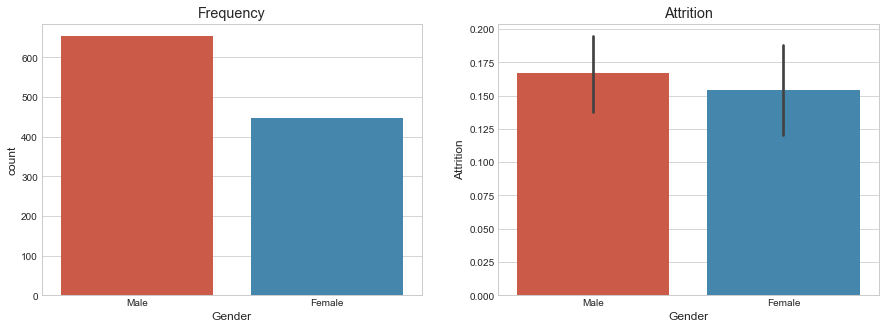

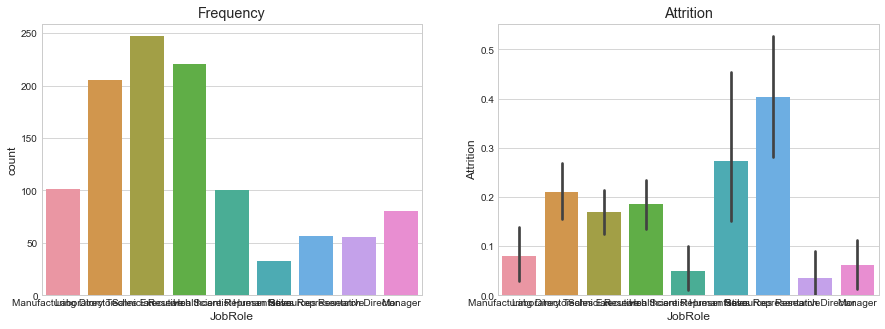

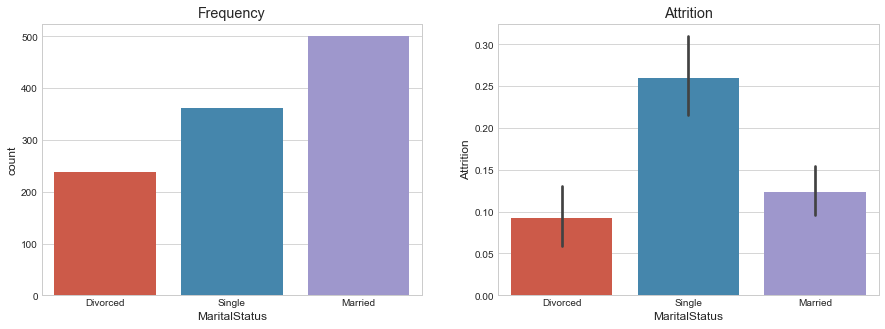

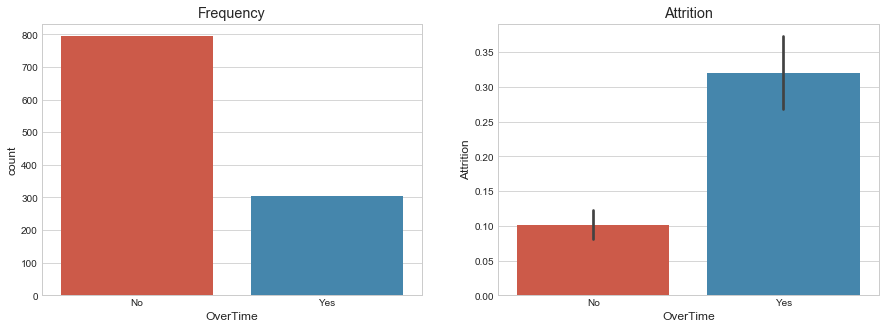

In [10]:
for col in cat_col:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    sns.countplot(x=col, data=df_train, ax=ax1)
    sns.barplot(x=col, y=target_var, data=df_train, ax=ax2)
    ax1.set_title('Frequency')
    ax2.set_title('Attrition')

从上面的图可以看出，有些特征在样本中所在的比例非常小，比如在DepartMent和EducationField中，HumanResource在样本中所在的比例非常小，在特征处理中，可以考虑将这类特征值与其他特征值合并。

在分类变量中，有Department，EducationField，我觉得这些变量似乎存在关系，比如学习human resource的不太可能去从事research的工作。用卡方检验检查这些变量之间的关系。

(821.98419918238608, 3.8704258660579047e-170, 10, array([[   0.72545455,   17.64      ,    4.84909091,   12.86727273,
           2.40545455,    3.51272727],
       [  12.55727273,  305.34      ,   83.93545455,  222.72636364,
          41.63727273,   60.80363636],
       [   5.71727273,  139.02      ,   38.21545455,  101.40636364,
          18.95727273,   27.68363636]]))


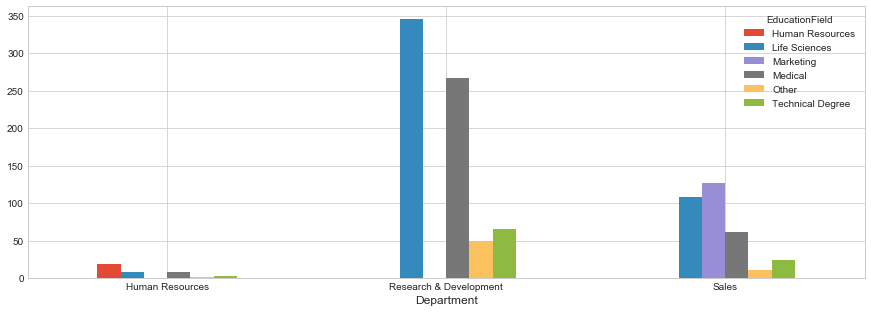

In [11]:
contingency_table = df_train.pivot_table(index='Department', columns='EducationField', values='sum', aggfunc=sum).fillna(0)
print(stats.chi2_contingency(contingency_table))
contingency_table.plot(kind='bar', figsize=(15,5), rot=0)

零假设是Department和EducationField相互独立，显著性水平是0.05。计算得到的p值远小于0.05，所以拒绝零假设，即两个变量之间不独立。<br>
从图中也可以看出，学习human resource的员工，全部在human resource部门，学习life sciences和medical的大多从事research的工作，有些从事的是human resource工作。学习marketing几乎全在sales部门。<br>
同样用卡方检验，分析其他变量之间的关系，直接筛选除P值小于0.05的变量组。

In [12]:
for x in cat_col:
    for y in cat_col:
        if x != y:
            contingency_table = df_train.pivot_table(index=x, columns=y, values='sum', aggfunc=sum).fillna(0)
            _, p, _, _ = stats.chi2_contingency(contingency_table)
            if p <= 0.05:
                print('{}<----->{}, pvalue={:.4f}'.format(x, y, p))

Department<----->EducationField, pvalue=0.0000
Department<----->JobRole, pvalue=0.0000
EducationField<----->Department, pvalue=0.0000
EducationField<----->JobRole, pvalue=0.0000
JobRole<----->Department, pvalue=0.0000
JobRole<----->EducationField, pvalue=0.0000


从上面的结果可以看出:
1. Department, EducationField, JobRole三者之间不独立
2. EducationField与MaritalStatus不独立

所以，可以在分类变量中删除EducationField和JobRole。

### 有序变量分析

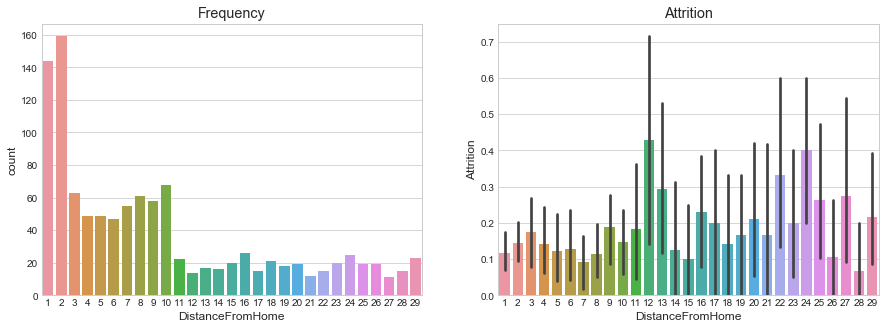

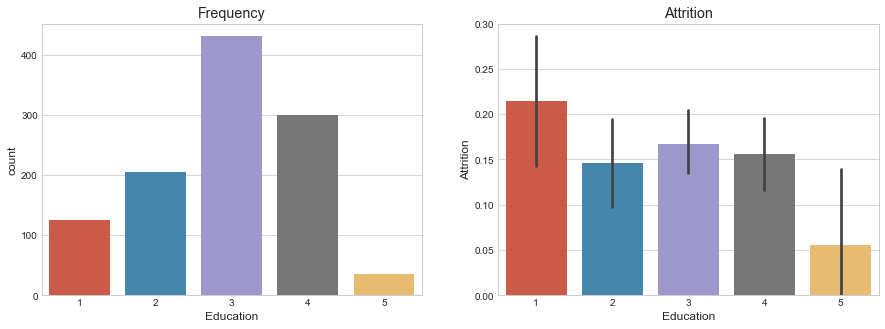

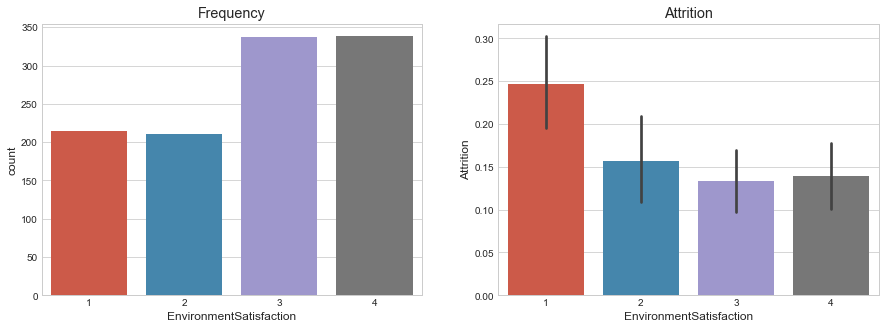

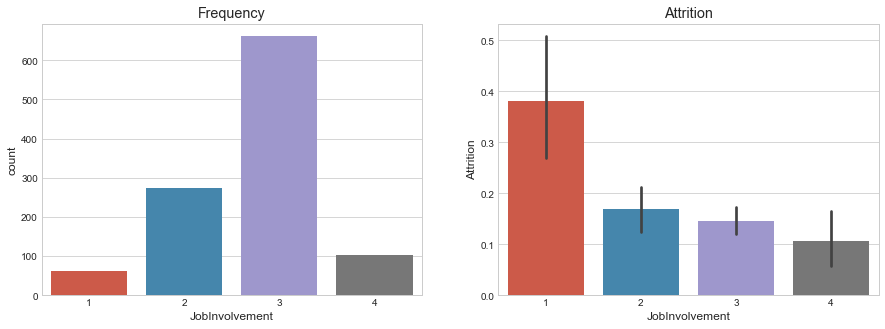

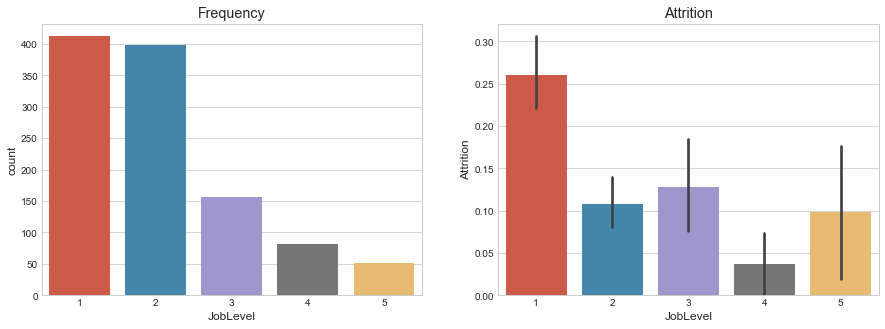

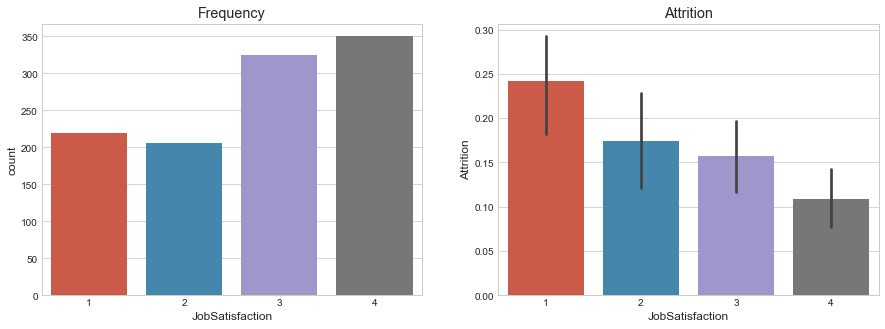

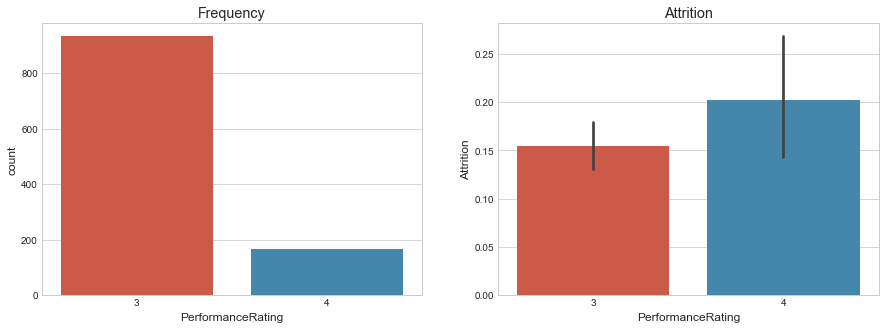

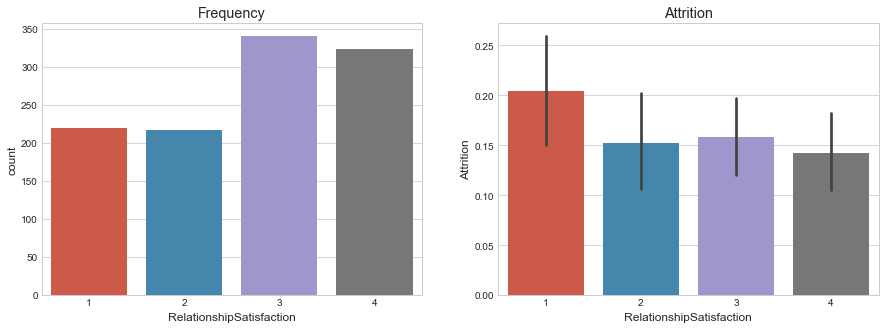

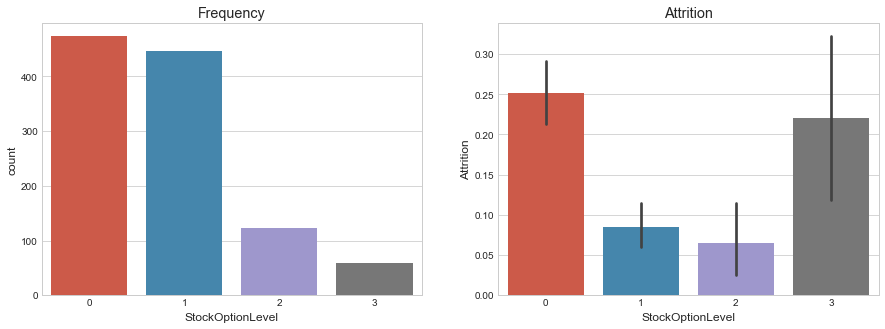

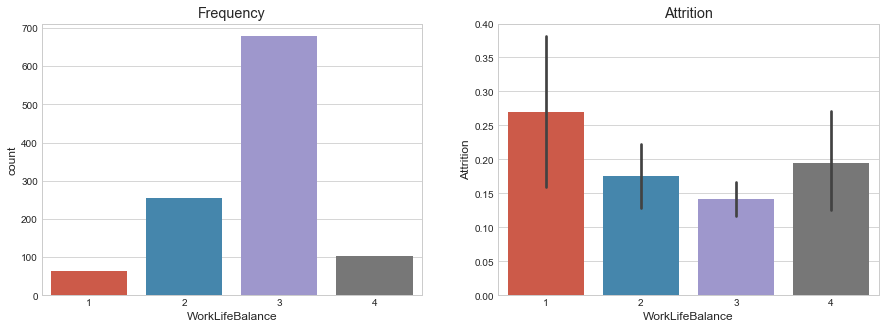

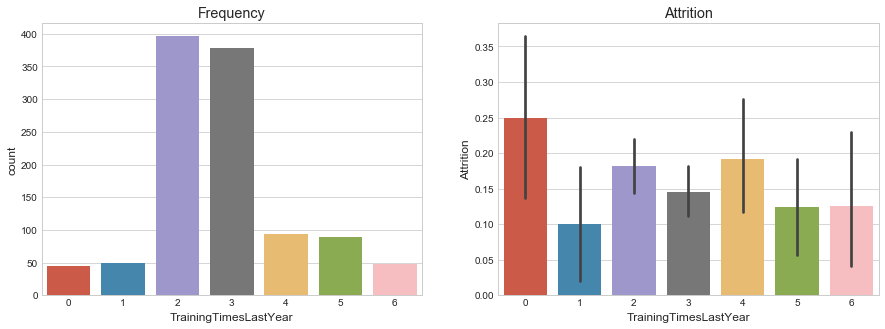

In [13]:
for col in ord_col:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    sns.countplot(x=col, data=df_train, ax=ax1)
    sns.barplot(x=col, y=target_var, data=df_train, ax=ax2)
    ax1.set_title('Frequency')
    ax2.set_title('Attrition')

同样，对于有序变量来说，部分样本所在比例很低，可以考虑将它们和其他变量合并。

对有序变量进行卡方检验。

In [14]:
for x in ord_col:
    for y in ord_col:
        if x != y:
            contingency_table = df_train.pivot_table(index=x, columns=y, values='sum', aggfunc=sum).fillna(0)
            _, p, _, _ = stats.chi2_contingency(contingency_table)
            if p<=0.05:
                print('{}<----->{}, pvalue={:.4f}'.format(x, y, p))

Education<----->JobLevel, pvalue=0.0007
EnvironmentSatisfaction<----->JobInvolvement, pvalue=0.0328
JobInvolvement<----->EnvironmentSatisfaction, pvalue=0.0328
JobLevel<----->Education, pvalue=0.0007
JobLevel<----->StockOptionLevel, pvalue=0.0061
StockOptionLevel<----->JobLevel, pvalue=0.0061


根据卡方检验的结果，可以得到结论：
1. Education，JobLevel，StockOptionLevel三者之间存在关联关系
2. 环境满意度和工作投入度不独立

In [16]:
for x in ord_col+cat_col:
    for y in ord_col+cat_col:
        if x != y:
            contingency_table = df_train.pivot_table(index=x, columns=y, values='sum', aggfunc=sum).fillna(0)
            _, p, _, _ = stats.chi2_contingency(contingency_table)
            if p<=0.05:
                print('{}<----->{}, pvalue={:.4f}'.format(x, y, p))

Education<----->JobLevel, pvalue=0.0007
EnvironmentSatisfaction<----->JobInvolvement, pvalue=0.0328
EnvironmentSatisfaction<----->OverTime, pvalue=0.0348
JobInvolvement<----->EnvironmentSatisfaction, pvalue=0.0328
JobLevel<----->Education, pvalue=0.0007
JobLevel<----->StockOptionLevel, pvalue=0.0061
JobLevel<----->Department, pvalue=0.0000
JobLevel<----->EducationField, pvalue=0.0000
JobLevel<----->JobRole, pvalue=0.0000
JobSatisfaction<----->Gender, pvalue=0.0392
StockOptionLevel<----->JobLevel, pvalue=0.0061
StockOptionLevel<----->MaritalStatus, pvalue=0.0000
TrainingTimesLastYear<----->OverTime, pvalue=0.0030
Department<----->JobLevel, pvalue=0.0000
Department<----->EducationField, pvalue=0.0000
Department<----->JobRole, pvalue=0.0000
EducationField<----->JobLevel, pvalue=0.0000
EducationField<----->Department, pvalue=0.0000
EducationField<----->JobRole, pvalue=0.0000
Gender<----->JobSatisfaction, pvalue=0.0392
JobRole<----->JobLevel, pvalue=0.0000
JobRole<----->Department, pvalue=0

## 异常检测

In [21]:
# 将分类变量转换为数值型
label_enc = LabelEncoder()
for col in cat_col:
    df_train[col] = label_enc.fit_transform(df_train[col])

In [11]:
from collections import Counter
outliers_cnt = Counter()
for col in sqrt_num_col+ord_col+cat_col:
    Q1 = np.percentile(df_train[col], 25)
    Q3 = np.percentile(df_train[col], 75)
    step = 1.5 * (Q3 - Q1)
    
    print("Data points considered outliers for the feature '{}':".format(col), end='')
    outlets_df = df_train[~((df_train[col] >= Q1 - step) & (df_train[col] <= Q3 + step))]
    outlets_num = len(outlets_df)
    print('异常点个数:{}'.format(outlets_num))
    for index in outlets_df.index:
        outliers_cnt[index] += 1
        
outlet_sample = [x for x in outliers_cnt if outliers_cnt[x]>1]
print('\n在超过一个特征被视为异常点的样本一共有:{}个,占比{:.4f}，分别是：'.format(len(outlet_sample), len(outlet_sample)/1100))
print(outlet_sample)

Data points considered outliers for the feature 'Age_sqrt':异常点个数:0
Data points considered outliers for the feature 'MonthlyIncome_sqrt':异常点个数:0
Data points considered outliers for the feature 'TotalWorkingYears_sqrt':异常点个数:10
Data points considered outliers for the feature 'PercentSalaryHike_sqrt':异常点个数:0
Data points considered outliers for the feature 'YearsAtCompany_sqrt':异常点个数:25
Data points considered outliers for the feature 'YearsInCurrentRole_sqrt':异常点个数:0
Data points considered outliers for the feature 'YearsSinceLastPromotion_sqrt':异常点个数:0
Data points considered outliers for the feature 'YearsWithCurrManager_sqrt':异常点个数:0
Data points considered outliers for the feature 'NumCompaniesWorked_sqrt':异常点个数:0
Data points considered outliers for the feature 'DistanceFromHome':异常点个数:0
Data points considered outliers for the feature 'Education':异常点个数:0
Data points considered outliers for the feature 'EnvironmentSatisfaction':异常点个数:0
Data points considered outliers for the feature 'JobIn

## 保存数据

In [17]:
# 连续变量开平方转换
df_train[num_col] = np.sqrt(df_train[num_col])

In [13]:
# 删除异常值
df_train.drop(outlet_sample, axis=0, inplace=True)

In [18]:
df_train.drop(['sum', 'Over18', 'EmployeeNumber', 'StandardHours'], axis=1, inplace=True)

In [19]:
df_train.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,YearsWithCurrManager,Age_sqrt,MonthlyIncome_sqrt,TotalWorkingYears_sqrt,PercentSalaryHike_sqrt,YearsAtCompany_sqrt,YearsInCurrentRole_sqrt,YearsSinceLastPromotion_sqrt,YearsWithCurrManager_sqrt,NumCompaniesWorked_sqrt
0,6.082763,0,Travel_Rarely,Research & Development,1,4,Life Sciences,1,Male,2,...,2.645751,6.082763,77.414469,2.645751,4.242641,2.645751,2.236068,0.000000,2.645751,1.000000
1,7.348469,0,Travel_Frequently,Research & Development,1,4,Life Sciences,4,Female,3,...,2.000000,7.348469,102.479266,5.744563,4.123106,2.236068,2.000000,1.000000,2.000000,2.645751
2,5.830952,1,Travel_Frequently,Research & Development,7,3,Life Sciences,1,Male,1,...,2.449490,5.830952,77.935871,3.000000,4.898979,3.000000,2.645751,0.000000,2.449490,1.000000
3,6.244998,0,Travel_Rarely,Research & Development,1,1,Life Sciences,4,Female,2,...,2.828427,6.244998,112.880468,4.582576,4.000000,4.582576,2.449490,3.316625,2.828427,1.000000
4,5.291503,1,Travel_Frequently,Research & Development,1,3,Medical,1,Male,2,...,0.000000,5.291503,50.950957,1.000000,3.872983,1.000000,0.000000,0.000000,0.000000,1.000000


In [22]:
df_train.to_csv('../dataset/pfm_modified.csv', index=False)